# Naive Bayes i Classificació


En aquest tercer lliurament es programarà un classificador, que donada una *piulada*, la categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb *piulades* relacionades amb el *cyber bullying*.

Recordeu que l'objectiu principal d'aquesta pràctica és desenvolupar un classificador amb una *accuracy* alta. 


**Què s’ha de fer?**

Volem classificar *piulades* segons a quin tipus de *cyber bullying* pertanyen. Així doncs, a partir de tots les *piulades* que tenim, crearem un vector de característiques que ens descrigui cadascuna. A continuació desenvoluparem un classificador probabilístic del tipus **Naive Bayes** que ens permeti identificar a quina classe de *cyber bullying* pertany una *piulada* donada, segons les característiques disenyades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat. 

El procés de classificació consta de dues parts: 

+ el procés d'aprenentatge i 
+ el procés d'explotació o testeig. 

El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment representades per nombres reals, i $y$ és la categoria a la que pertanyen. 
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=f(x)$ que donada una $x$ aconsegueixi que $\hat{y}$ sigui semblant $y$. 

Per altra banda el procés de testeig aplica la funció $f(x)$ apresa a l'entrenament a a dades no presents en el conjunt d'aprenentatge per avaluar el classificador.

**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic. 
Una de les representacions més simples per tal de descriure un text és la representació ["bag-of-words"](https://en.wikipedia.org/wiki/Bag-of-words_model).

Aquesta representació converteix un text en un vector de $N$ paraules. 
Primer haurem de seleccionar el conjunt d'$N$ paraules que volem fer servir. Després, per cada paraula comptar quants cops apareix en el text. 

Una versió alternativa i més simple d'aquest procés pot ser simplement indicar al vector si una determinada paraula apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Re` i `NLTK`

Python té un paquet integrat anomenat ["re"](https://www.w3schools.com/python/python_regex.asp), que es pot utilitzar per treballar amb expressions regulars. És molt aconsellable fer servir aquest paquet per processar les paraules.

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Les dades

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de *cyber bullying* durant la pandèmia COVID-19. 

Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del *cyber bullying* i un 87% n'han estat testimonis, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 *piulades* etiquetades d'acord amb la classe de *cyber bullying* que s'està donant:

1. `age`;
2. `ethnicity`;
3. `gender`;
4. `religion`;
5. `other type of cyberbullying`;
6. `not cyberbullying`

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Lectura de les dades

In [5]:
import pandas as pd
import numpy as np
import re

In [6]:
df = pd.read_csv('./cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [70]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

## Preparació del dataset

Dividim les *piulades* en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de classificació.

In [7]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [72]:
df_tweets_train['cyberbullying_type'].value_counts()

cyberbullying_type
gender                 6451
not_cyberbullying      6377
religion               6370
ethnicity              6369
age                    6361
other_cyberbullying    6225
Name: count, dtype: int64

In [73]:
df_tweets_test['cyberbullying_type'].value_counts()

cyberbullying_type
age                    1631
religion               1628
other_cyberbullying    1598
ethnicity              1592
not_cyberbullying      1568
gender                 1522
Name: count, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisi exploratòria de les dades: Informació bàsica sobre les *piulades*.
2. Processament de les dades: Creació d'un vector de característiques a partir de les *piulades*.
3. Desenvolupament d'un classificador *Naive Bayes*. 

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de visualitzacions per observar les dades, com ara:

* el nombre de *piulades* que s'estan dirigint a una persona en concret
* el nombre de  *hashtags* que hi ha a cada categoria de *piulades*
* el nombre de  *piulades* que hi ha de cada categoria de *piulades*
* el nombre de  *piulades* de la categoria `not_cyberbullying` que es dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants.

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
40252,@stephenasmith fuck you nigga. Or nigger. What...,ethnicity
29381,@ibogost SAVE SOME RIBBONS FOR ME. &lt;3 &lt;3...,other_cyberbullying
22973,LGBTQ rights should have nothing to do with po...,religion
26401,@taitaisanchez i hate cardio. lifting is a lot...,other_cyberbullying
25232,Even if they asked for permission - and who kn...,other_cyberbullying


#### EXERCICI 1: 

* Quantes *piulades* estan dirigides a un usuari concret? Diem que una piulada va dirigida a una persona en concret si contenen el patró ``@usuari``. 

[Restriccions](https://help.twitter.com/en/managing-your-account/change-twitter-handle) que imposa X sobre el patró:
+ Nomes són valids aquells patrons amb caràcters alfanumèrics ``[A-z 0-9]`` i el caràcter ``_``
+ Els patrons han de començar per ``@`` i han de tenir més de 4 i menys de 16 caràcters.

En aquest exercici és extremadament útil l'ús del mòdul ``re``.

In [76]:
# # El vostre codi aquí
# # Patró per detectar usuaris
# # patro_usuari = r'@[A-Za-z0-9_]{4,15}'
# # df['dirigida_a_usuari'] = df['tweet_text'].apply(lambda text: bool(re.search(patro_usuari, str(text))))

# # nombre_piulades_dirigides = df['dirigida_a_usuari'].sum()
# # print(f"Nombre de piulades dirigides a un usuari concret: {nombre_piulades_dirigides}")

# Patró per detectar usuaris
pattern_user = r"@\w{4,15}"

# Comptar piulades dirigides a un usuari
piulades_dirigides_train = df_tweets_train['tweet_text'].apply(
    lambda piulada: bool(re.search(pattern_user, piulada))
).sum()

piulades_dirigides_test = df_tweets_test['tweet_text'].apply(
    lambda piulada: bool(re.search(pattern_user, piulada))
).sum()

print(f"En el conjunt d'entrenament hi tenim {piulades_dirigides_train} piulades dirigides a un usuari concret.")
print(f"En el conjunt de testeigs hi tenim {piulades_dirigides_test} piulades dirigides a un usuari concret.")

En el conjunt d'entrenament hi tenim 14413 piulades dirigides a un usuari concret.
En el conjunt de testeigs hi tenim 3571 piulades dirigides a un usuari concret.


+ Quants *hashtags* ``#`` hi ha a cada categoria de *piulades*?

Compteu els ``#`` que vagin seguits d'alguna lletra o nombre ja que, com veiem a la [normativa](https://help.twitter.com/en/using-twitter/how-to-use-hashtags) de X, els ``#`` no poden contenir cap mena de signe de puntuació.

In [77]:
# # # # El vostre codi aquí
# # # patro_hashtag = r'#\w+' 
# # # df['nombre_hashtags'] = df['tweet_text'].apply(lambda text: len(re.findall(patro_hashtag, str(text))))
# # # hashtags_per_categoria = df.groupby('cyberbullying_type')['nombre_hashtags'].sum()

# # # print(hashtags_per_categoria)

# pattern_hashtags = re.compile(r'#([A-Za-z0-9]+)\b')

# # Comptar hashtags en cada piulada
# df['nombre_hashtags'] = df['tweet_text'].apply(
#     lambda text: len(re.findall(pattern_hashtags, str(text))) if isinstance(text, str) else 0
# )

# # Comptar hashtags per categoria
# hashtags_per_categoria = df.groupby('cyberbullying_type')['nombre_hashtags'].sum()

# print(hashtags_per_categoria)


pattern_hashtags = re.compile(r'#([A-Za-z0-9]+)\b')

# Comptar hashtags en cada piulada
df['nombre_hashtags'] = df['tweet_text'].apply(
    lambda text: len(re.findall(pattern_hashtags, str(text))) if isinstance(text, str) else 0
)

# Comptar hashtags per categoria
hashtags_per_categoria = df.groupby('cyberbullying_type')['nombre_hashtags'].sum().reset_index()
hashtags_per_categoria.rename(columns={'nombre_hashtags': 'total_hashtags'}, inplace=True)

result_train = count_hashtags_categories(df_tweets_train)
print(result_train)


NameError: name 'count_hashtags_categories' is not defined

+ Fes un histograma que representi aquesta distribució?

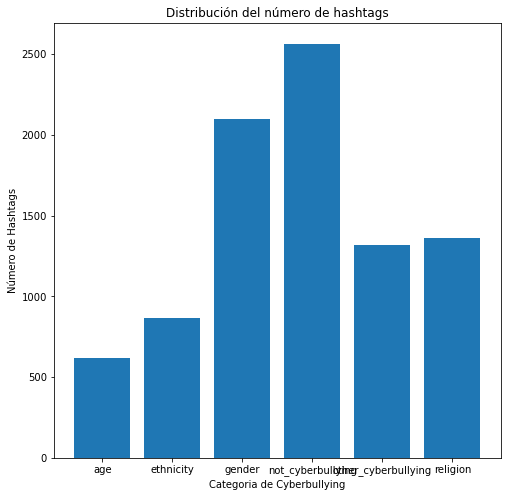

In [20]:
plt.figure(figsize = (8,8))

plt.bar(result['cyberbullying_type'], result['hashtags'])
plt.title('Distribución del número de hashtags')
plt.xlabel('Categoria de Cyberbullying')
plt.ylabel('Número de Hashtags')

plt.show()


+ Comproveu a continuació quantes vegades hi ha un ús invàlid dels ``#``, per exemple ``##`` o ``#@``, on, si no tinguessim en compte la restriccio imposada, hauriem contat 2 ``#`` a ``##`` o 1 ``#`` a ``#@``, quan en realitat son 1 i 0 respectivament.

In [27]:
# Patró per detectar hashtags invàlids
pattern_invalid = re.compile(r'#(?![A-Za-z0-9])') 

# Comptar hashtags invàlids en cada piulada
df_tweets_train['hashtags_invalids'] = df_tweets_train['tweet_text'].apply(
    lambda text: len(re.findall(pattern_invalid, str(text))) if isinstance(text, str) else 0
)

# Comptar total d'usos invàlids de hashtags
invalid_hashtags_train = df_tweets_train['hashtags_invalids'].sum()

# Mostrar el resultat
print(f"Nombre total d'usos invàlids de hashtags en el conjunt d'entrenament: {invalid_hashtags_train}")


Nombre total d'usos invàlids de hashtags en el conjunt d'entrenament: 74


+ Quantes *piulades* vàlides hi ha de cada categoria?

In [33]:
pattern_invalid = re.compile(r'#\W*#|#@')

# Comprovar si una piulada és vàlida (no conté hashtags invàlids)
df_tweets_train['es_valida'] = df_tweets_train['tweet_text'].apply(
    lambda text: len(re.findall(pattern_invalid, str(text))) == 0 if isinstance(text, str) else False
)

# Comptar piulades vàlides per categoria
piulades_valides_per_categoria = df_tweets_train[df_tweets_train['es_valida']].groupby('cyberbullying_type').size().reset_index()

# Canviar el nom de la columna per a claredat
piulades_valides_per_categoria.rename(columns={0: 'valid_tweets'}, inplace=True)

# Mostrar el resultat
print(piulades_valides_per_categoria)


    cyberbullying_type  valid_tweets
0                  age          6357
1            ethnicity          6343
2               gender          6377
3    not_cyberbullying          6308
4  other_cyberbullying          6290
5             religion          6472


+ Quantes *piulades* de la categoria `not_cyberbullying` és dirigeixen a un usuari?
+ Quantes *piulades* de totes les altres categories és dirigeixen a un usuari?

In [39]:
# patro_usuari = re.compile(r'@\w+')

# Filtrar piulades de la categoria 'not_cyberbullying' i altres categories
piulades_not_cyberbullying = df_tweets_train[df_tweets_train['cyberbullying_type'] == 'not_cyberbullying']
piulades_altres_categories = df_tweets_train[df_tweets_train['cyberbullying_type'] != 'not_cyberbullying']

# Comptar piulades amb mencions en cada categoria
nombre_piulades_not_cyberbullying_amb_mencion = piulades_not_cyberbullying['tweet_text'].apply(
    lambda text: bool(re.search(patro_usuari, str(text)))
).sum()

nombre_piulades_altres_categories_amb_mencion = piulades_altres_categories['tweet_text'].apply(
    lambda text: bool(re.search(patro_usuari, str(text)))
).sum()

# Resultats
print(f"Nombre de piulades 'not_cyberbullying' que es dirigeixen a un usuari: {nombre_piulades_not_cyberbullying_amb_mencion}")
print(f"Nombre de piulades de les altres categories que es dirigeixen a un usuari: {nombre_piulades_altres_categories_amb_mencion}")


Nombre de piulades 'not_cyberbullying' que es dirigeixen a un usuari: 3292
Nombre de piulades de les altres categories que es dirigeixen a un usuari: 11201


+ Calculeu altres coses que penseu que poden ser rellevants (usuaris més mencionats, *hashtags* més comuns per cada categoria, etc.).

In [14]:
# Patró per detectar mencions (@usuari)
# patro_usuari = re.compile(r'@(\w+)')

# Extreure totes les mencions i comptar-ne la freqüència
totes_les_mencions = df_tweets_train['tweet_text'].dropna().apply(
    lambda text: re.findall(patro_usuari, str(text))
).explode()

usuaris_mes_mencionats = totes_les_mencions.value_counts().head(10)

print("Usuaris més mencionats:")
print(usuaris_mes_mencionats)



# Calcula la longitud de cada piulada
df_tweets_train['longitud'] = df_tweets_train['tweet_text'].apply(lambda text: len(str(text)))

# Longitud mitjana per categoria
longitud_mitjana_per_categoria = df_tweets_train.groupby('cyberbullying_type')['longitud'].mean()

print("Longitud mitjana de les piulades per categoria:")
print(longitud_mitjana_per_categoria)

NameError: name 'patro_usuari' is not defined

### 2. Comptar paraules

In [52]:
# No modificar aquesta cel·la, s'encarrega de fer el procés més eficient.
# Intenteu entendre quà fa aquesta cel·la

def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

El primer que haurem d'implementar és la funció ``standardize`` que estandaritzarà les paraules.

#### EXERCICI 2: 

+ Empleneu la funció següent que, donada una paraula, la estandaritzi les paraules passant tots els caràcters a minúscules.

**Observació:** Podeu considerar diverses possibilitats per aquesta funció:
* Només canviar les lletres majúscules per minúscules
* Eliminar tots els símbols que no siguin @, # i _ (i substituïr-los per un espai)
* Eliminar tots els símbols (i substituïr-los per un espai)
* etc.

El mòdul `re` de Python és especialment útil en aquest punt. 

Trieu aquella possibilitat que dóna millor resultats a l'exercici 7!

In [53]:
@memo
def standardize(word):
    """
    :param word: paraula a estandaritzar
    :return : paraula estandaritzada
    """
    # Comprovació de si 'word' és una cadena
    if not isinstance(word, str):
        return word

    # Convertir a minúscules
    word = word.lower()

    # Eliminar tots els símbols que no siguin @, # i _
    symbolsPattern = re.compile(r'[^a-z0-9@#_]')
    word = re.sub(symbolsPattern, ' ', word).strip()

    # Substituir múltiples espais per un de sol
    word = re.sub(r'\s+', ' ', word)

    return word


In [54]:
standardize("Taller DELS noUS USOS")

'taller dels nous usos'

#### EXERCICI 3: 

+ Feu una funció ``count_words`` que construeixi un diccionari que contingui totes les paraules que s'han trobat al dataset, tot indicant el total de cops que ha aparegut cadascuna i el nombre de piulades on apareix. 

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_piu': 76},
    'best': {'n_ocur': 123, 'n_piu': 65},
    ...
}
```

In [55]:
def count_words(df):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """

    dicc = {}
    for text in df['tweet_text']:
        text_standarized = standardize(text)
        words = text_standarized.split()

        seen = set()
        for word in words:
            if word not in dicc:
                dicc[word] = {'n_ocur': 0, 'n_piu': 0}
            dicc[word]['n_ocur'] += 1
            if word not in seen:
                dicc[word]['n_piu'] += 1
                seen.add(word)
    return dicc

In [56]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))
print("'rape':",dicc_text['rape'])

54055
'rape': {'n_ocur': 3570, 'n_piu': 3254}


### 3. Comptar paraules per cada categoria de piulada

In [57]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
33732,fav part of #BellLetsTalk is all the girls who...,age
17264,Even men who claimed to be feminist are only p...,religion
19441,Oh really. Then kindly shed that who brought p...,religion
43902,Dumb nigger shut the fuck up before I hang you...,ethnicity
3160,@dale_in_denver Who assumed what now?,not_cyberbullying


#### EXERCICI 4: 

+ Fent servir la funció que se us dona a continuació (`eachTopic`), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_piu': 76},
        'what': {'n_ocur': 123, 'n_piu': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_piu': 17},
        'you': {'n_ocur': 154, 'n_piu': 66}
    }
    ...
}
```

In [58]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les
    paraules i el número de piulades on ha aparegut.
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.

    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """
    words_topic = {}

    def eachTopic(group):
        # Count words on this topic and save to dictionary
        words_topic[group.name] = count_words(group)

    # El vostre codi aquí
    df.groupby('cyberbullying_type').apply(eachTopic)

    return words_topic


In [59]:
words_categories = count_words_categories(df_tweets_train)
print ("Categories:", len(words_categories))
print ("La paraula 'muslims' a la categoria 'religion':", words_categories["religion"]['muslims'])

Categories: 6
La paraula 'muslims' a la categoria 'religion': {'n_ocur': 1938, 'n_piu': 1691}


C:\Users\victo\AppData\Local\Temp\ipykernel_7092\1496760919.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


### 4. Paraules més freqüents a les piulades


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total de piludades (sense tenir en compte la categoria). És a dir, paraules que no són ni massa freqüents ni massa poc. Podeu experimentar variant aquests valors.

Una altra estratègia interessant és eliminar "stop words".

#### EXERCICI 5: 

+ Feu una funció ``topNwords`` que crei un diccionari amb les N paraules més representatives (les que apareixen amb més freqüència) de cadascuna de les categories de *cyberbullying* (Tenint en compte que haureu tret aquelles paraules que apareixen en la majoria de piulades, així com també, les que únicament apareixen en un conjunt molt petit de piulades). Una pista de que aneu ben encaminats es que per cadascuna de les categories de *cyberbullying* obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

+ Experimenteu omplint la llista `skip_top` amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de `cyberbullying`.

In [92]:
def define_skiptop():
    stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
    "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why", "how",
    "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will",
    "just", "don", "should", "now", "rt", "co", "u", "one", "http", "https", "www",
    "com", "t", "s", "like"
    ]


    return stop_words


def topNwords(df, words, N, skip=[]):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,  
                                        categoria2: llista_top_words_cat_2, ...} 
    """
    top_words=dict()

    for category in df['cyberbullying_type'].unique():
        df_filtered = df[df['cyberbullying_type'] == category]

        category_words = {}
        for word, info in words[category].items():
            if skip is not []:
                if word not in skip: category_words[word] = info['n_ocur']
            else:
                if 0.1 <= (info['n_ocur'] / df_filtered.shape[0]) <= 0.7:
                    category_words[word] = info['n_ocur']

        sorted_words = sorted(category_words.items(), key=lambda x: x[1], reverse=True)

        top_words[category] = [word for word, freq in sorted_words[:N]]


    return top_words



### 5. Vector de Característiques

#### EXERCICI 6: 

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes amb la funció ``create_features``.

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

In [61]:
def create_features(df, top_words):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a 
        cadascuna de les piulades amb el vector de característiques corresponent.
    """
    all_worlds = [word for category, words in top_words.items() for word in words]
    all_worlds = set(all_worlds)
    n_words = len(all_worlds)
    valid_idx = df.index.tolist()
    dict_feat_vector = {}
    for idx, piulada in enumerate(df['tweet_text']):
        vect_piulada = np.zeros(n_words, dtype=int)

        piulada_standardized = [standardize(word) for word in piulada.split()]

        for pos, top_word in enumerate(all_worlds):
            if top_word in piulada_standardized: vect_piulada[pos] = 1

        dict_feat_vector[valid_idx[idx]] = vect_piulada


    return dict_feat_vector

In [62]:
N = 20 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor.
words_categories = count_words_categories(df_tweets_train)

top_words = topNwords(df_tweets_train, words_categories, N, skip = define_skiptop())
dict_feat_vector = create_features(df_tweets_train, top_words)


C:\Users\victo\AppData\Local\Temp\ipykernel_7092\1496760919.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


In [63]:
len(dict_feat_vector)

38153

### 6. El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria. 
En aquest lliurament farem servir el classificador Naïve Bayes. 
Aquest classificador forma part de la família de classificadors probabilístics. 
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories. 
La decisió final correspon a la categoria amb més probabilitat. 


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per estimar la probabilitat condicionada $p(y|x)$, on $y$ és la categoria i $\mathbf x$ les característiques de l'exemple.

La fòrmula de Bayes és fàcil de deduir. Sabem que:

$$ p(\mathbf x,y) = p(\mathbf x|y)p(y) = p(y|\mathbf x)p(\mathbf x)$$
d'on podem extreure que: 
$$ p(y|\mathbf x) = \frac{p(\mathbf x|y)p(y)}{p(\mathbf x)}$$


La millor categoria serà la que fa màxima la probabilitat $ p(y|\mathbf x)$ i per comparar aquests valors i saber quin és el màxim no cal calcular $p(\mathbf x)$ (que és constant). Per tant, considerarem que:
$$ p(y|\mathbf x) \approx p(y) · p(\mathbf x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians. 
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva. 
Considerem $\mathbf x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries (en el nostre cas, les paraules seleccionades). 
Naïve Bayes assumeix que la probabilitat de la presència d'una paraula en una piulada és independent de la presència d'una altra i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que una piuldad descrita pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en les piulades sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades. 
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a la piulada. 

Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat. 
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria. 
Aquest càlcul es fa dividint el nombre de piulades de la categoria en que apareix la paraula pel nombre total de piulades d'aquella categoria. 

En general:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on $A$ és el número de piulades de la categoria $C$ on hi apareix la paraula 'school' i $B$ és el número total de piulades de la categoria $C$.


#### Punts delicats a tenir en compte.

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0!!  Això vol dir, que si en una piulada no hi apareix una paraula, no pot ser classificada com cap tipus de *cyber bullying* (la presència del 0 al producte fa que el resultat sigui 0).

No sembla raonable que s'assigni o no en aquesta categoria segons si en la piulada hi apareix o no una única paraula. 
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero. 

Una de les possibles solucions es fer servir la correcció de Laplace. Seguint l'exemple anterior la correcció de Laplace és:

$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$ 

on $M$ és el nombre de categories.

**El problema de l'"underflow"**

La valor que hem de calcular en el Naive Bayes és el resultat d'un producte. 
El nombre de caractéristiques del vector és el nombre de termes del producte. 
Aquests nombres són iguals o menors a 1 i n'hi ha molts, si els multipliquem entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero. 

Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### EXERCICI 7: 

+ Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció ``naive_bayes_learn()``) que retorni un diccionari amb estructura `{categoria: [P0, ..., PN]}` on la llista representa la probabilitat
marginal condicionada de cada paraula del vector de característiques per la categoria corresponent. 

+ Implementeu la funció ``naive_bayes`` que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".  

In [64]:
def naive_bayes_learn(df, feats):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params feats: vector de característiques de cada piulada
    :return : probabilitats marginals condicionades
    """
    probs = {}
    cyberbullying_type  = df['cyberbullying_type'].unique()
    M = len(cyberbullying_type)

    for category in cyberbullying_type:
        # Filtrar tweets de la categoría actual
        df_filtered = df[df['cyberbullying_type'] == category]

        category_idx = df_filtered.index.tolist()

        B = len(category_idx)
        vector_length = len(next(iter(feats.values())))
        vector = np.zeros(vector_length, dtype=float)

        # Iterate over valid indices only
        valid_indices = [idx for idx in category_idx if idx in feats]

        for idx in valid_indices:
            vector += feats[idx]

        for idx, A in enumerate(vector):
            vector[idx] = (A + 1) / (B + M)

        probs[category] = vector

    return probs


In [65]:
import sys
from IPython import embed
def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.

    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.

    :param df_train: DataFrame amb les piulades que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de caracteristiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de caracteristiques de cada tweet de test
    :param df_test: DataFrame amb les piulades que s'utilitzaran pel test

    :return : Una serie on l'index correspon amb els indexos de df_test i els valors són la
              classificació retornada per Naive Bayes
    """
    probs = naive_bayes_learn(df_train, feat_train)
    #p_of_cat = count_words_categories(df_train)
    #p_total = len(p_of_cat.keys())

    p_total = len(df_train)
    p_of_cat = df_train['cyberbullying_type'].value_counts() / p_total

    def eachFeats(row):
        id, feat = row
        p_max = -float('inf')
        feat = np.array(feat)
        p_cat = None

        for category in probs:
            # Speed up by using numpy
            # inv is the inverse of features, 0 where 1 and 1 where 0
            # ...

            # Probs * feats is the probability of being there, while
            # inv - inv * feat = 1 - (0, 1, 0... inverses) * probs, probability of not being there
            # ...

            # Sum of logs [vs] underflow caused by mul of probs
            # ...

            # Take the max, do it now to avoid extra-loops
            # ...

            prob_category = np.log(p_of_cat[category])
            prob_category += np.sum(
                np.log(probs[category]) * feat + np.log(1 - probs[category]) * (1 - feat)
            )

            if prob_category > p_max:
                p_max = prob_category
                p_cat = category

        return id, p_cat

    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data)).reindex(df_test.index)
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))

    return correct.sum() / correct.size

In [91]:
N = 20 # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor.

words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, skip = [])

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

C:\Users\victo\AppData\Local\Temp\ipykernel_7092\1496760919.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


In [67]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.6717685291959324


Haurieu d'obtenir una precisió del 67-70%. 

#### EXERCICI 8: 

El possible procediment per tal d'aconseguir una major precisió seria el següent:
+ Es poden implementar diverses maneres d'escollir quines *stopwords* volem eliminar en les piuldades per a que no formin part dels vectors de característiques.
+ Avaluar quin conjunt d'*stopwords* retorna una precisió major per a N=40. 
+ Un cop tinguem el vector d'*stopwords* amb millors resultats, el testejarem per a diferents $N$'s per a veure quina és el nombre de *stopwords* òptim.

Feu una cerca a Intenet per trobar més estratègies i intenteu millorar l'*accuracy* que heu acosneguit fins ara.

Amb això podeu arribar a precisions superiors al 80%.

In [117]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words_ingles = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
N = 500

words_topics = count_words_categories(df_tweets_train)

top_words = topNwords(df_tweets_train, words_topics, N, skip = ['im'])
# Crear un diccionario para contar las palabras
# 2. Combinar todas las palabras de las categorías
all_words = count_words_categories(df_tweets_train)

# 3. Identificar palabras repetitivas (aparecen en varias categorías)
repeated_words = {
    word for word in set(all_words)
    if sum(word in words for words in top_words.values()) > 3
}
stop_words = repeated_words.union(stop_words_ingles)

C:\Users\victo\AppData\Local\Temp\ipykernel_7092\1496760919.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)
C:\Users\victo\AppData\Local\Temp\ipykernel_7092\1496760919.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cyberbullying_type').apply(eachTopic)


In [172]:
N = 80
top_words = topNwords(df_tweets_train, words_topics, N, skip = stop_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.7962050529405598


In [156]:
N = 120
top_words = topNwords(df_tweets_train, words_topics, N, skip = stop_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8023901876506971


In [151]:
N = 160
top_words = topNwords(df_tweets_train, words_topics, N, skip = stop_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8034385155676695


In [166]:
N = 900
top_words = topNwords(df_tweets_train, words_topics, N, skip = stop_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8173812768634029


In [153]:
N = 1200
top_words = topNwords(df_tweets_train, words_topics, N, skip = stop_words)
feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.8180102736135864
